In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

loading data to dataframe

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical feature
. sex
.smoker
.region

In [ ]:
# missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

data analysis

In [ ]:
# stat measure of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 504x360 with 0 Axes>

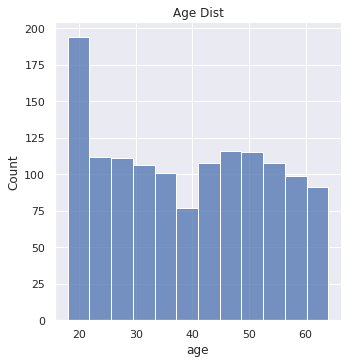

In [ ]:
# find the distribution of age value
sns. set()
plt.figure(figsize=(7,5))
sns.displot(df['age'])
plt.title('Age Dist')
plt.show()

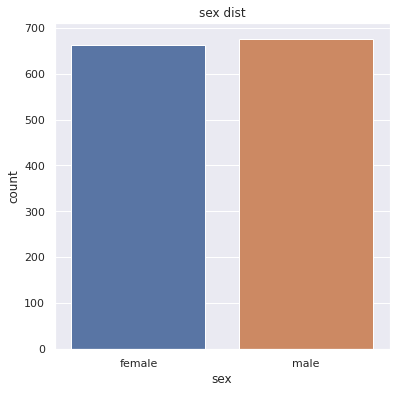

In [ ]:
# gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('sex dist')
plt.show()

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 504x360 with 0 Axes>

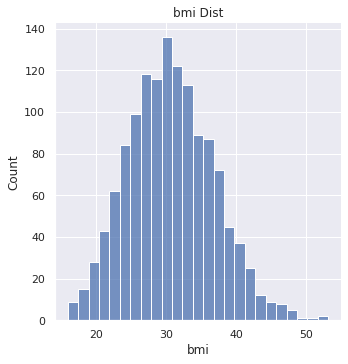

In [ ]:
# bmi distribution
plt.figure(figsize=(7,5))
sns.displot(df['bmi'])
plt.title('bmi Dist')
plt.show()

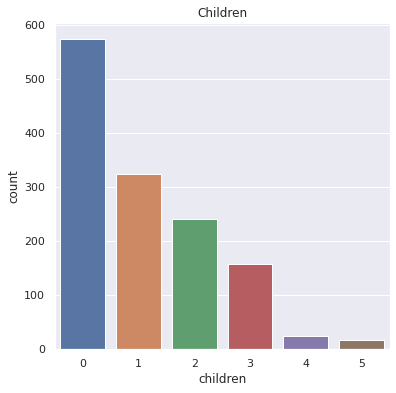

In [ ]:
# children distribution
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

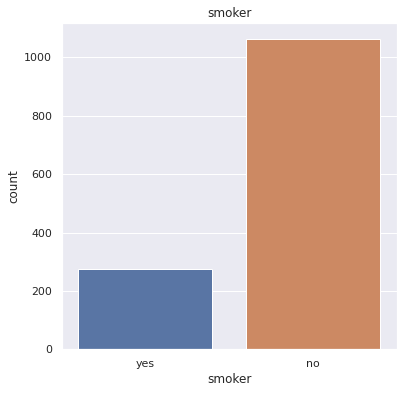

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

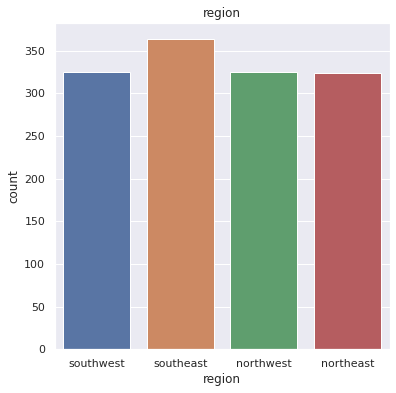

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 432x432 with 0 Axes>

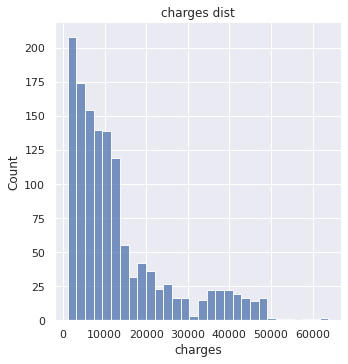

In [ ]:

plt.figure(figsize=(6,6))
sns.displot(df['charges'])
plt.title('charges dist')
plt.show()

data preprocessing

encoding categorical variables


In [ ]:
# encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding smoker colmn
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# encoding region
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

splitting the features and target

In [ ]:
X = df.drop(columns='charges', axis=1)
y = df['charges']

print(X)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


split data into train and split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2 )

print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


model training

linear regression model

In [ ]:
# loading the linear regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

model evaluation

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R-squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared value:', r2_train)

R squared value: 0.751505643411174


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value:', r2_test)

R squared value: 0.7447273869684077


building a predictive system

In [ ]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping  the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)

print(prediction)
print('The insuarance cost in USD', prediction[0])

[3760.0805765]
The insuarance cost in USD 3760.080576496064


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
